<a href="https://colab.research.google.com/github/vigneshchimata/vignesh15/blob/main/Copy_of_Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
X = data[['YearsExperience']]
y = data['Salary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")


Intercept: 25321.583011776813
Coefficient: [9423.81532303]


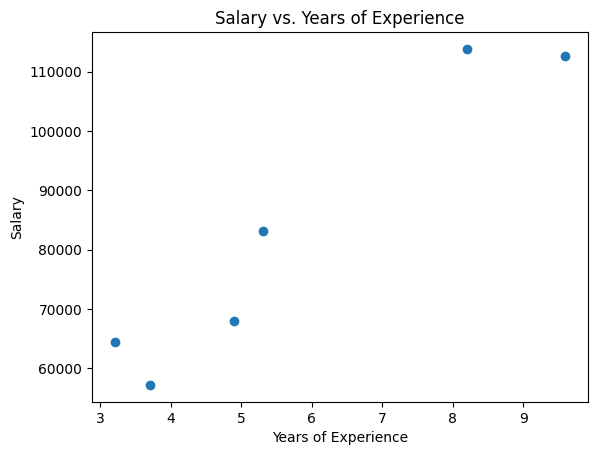

In [ ]:
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.scatter(X_test, y_test)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/IRIS (1).csv')

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)


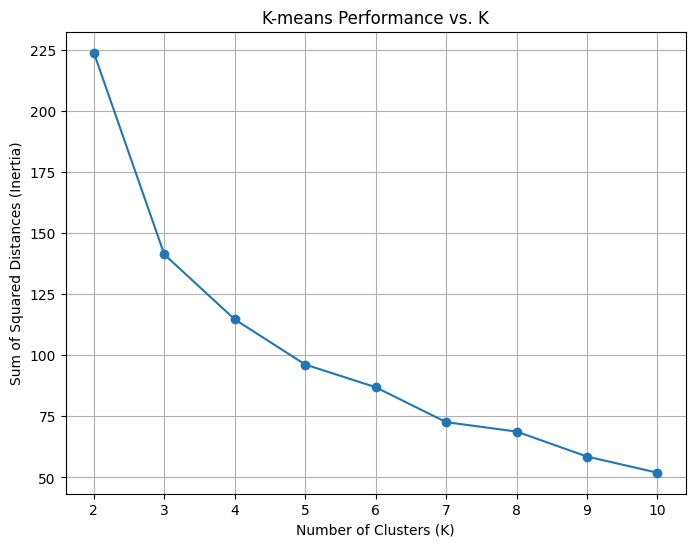

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('K-means Performance vs. K')
plt.grid(True)
plt.show()


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)



KMeans(n_clusters=3, random_state=0)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_



In [ ]:
inertia = kmeans.inertia_
print(f"Inertia (Sum of Squared Distances) for K={k}: {inertia}")



Inertia (Sum of Squared Distances) for K=3: 141.2208872836681


In [ ]:
data['cluster'] = labels



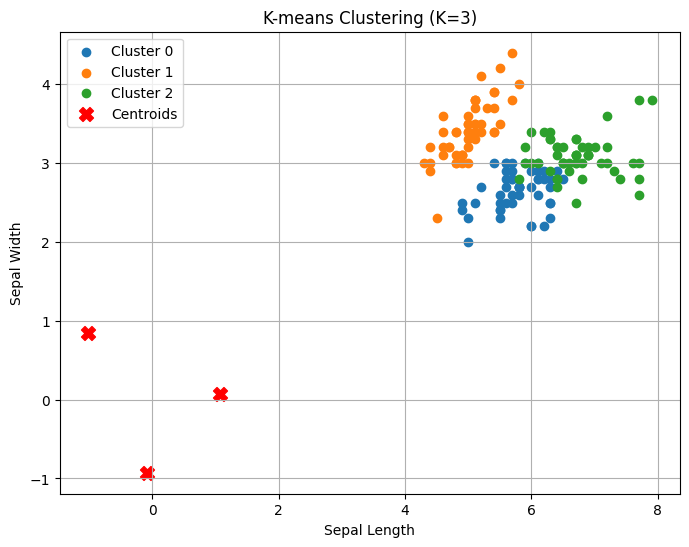

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X', label='Centroids')  # Plot centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (K=3)')
plt.legend()
plt.grid(True)
plt.show()
